# ARTIFICIAL NEURAL NETWORK

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
data_train = pd.read_csv('training_processed.csv')
data_valid = pd.read_csv('validation_processed.csv')

labels_train = data_train['ACTIVE']# ground truth labels
features_train = data_train.drop(['ACTIVE'], axis=1) 
labels_valid = data_valid['ACTIVE']# ground truth labels
features_valid = data_valid.drop(['ACTIVE'], axis=1)

In [4]:
ann = MLPClassifier()

ann_parameters = {'hidden_layer_sizes':(100, 100, 100), 'solver': ['lbfgs', 'sgd', 'adam'], 'alpha': [0.00001, 0.0001, 0.001, 0.01, 0,1]}
cross_val = KFold(n_splits=5)
ann_grid_search = GridSearchCV(estimator=ann, param_grid=ann_parameters, cv=cross_val, scoring=['roc_auc','accuracy'], refit='roc_auc')
ann_grid_result = ann_grid_search.fit(features_train, labels_train)
# summarize results

print("Best: %f using %s" % (ann_grid_result.best_score_, ann_grid_result.best_params_))
print("Average AUC for Decision Tree: ", np.mean(ann_grid_result.cv_results_['mean_test_roc_auc']))
print("Average Accuracy for Decision Tree: ", np.mean(ann_grid_result.cv_results_['mean_test_accuracy']))

d:\Users\annik\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\Users\annik\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
d:\Users\annik\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs fa

Best: 0.777678 using {'alpha': 0.0001, 'hidden_layer_sizes': 100, 'solver': 'adam'}
Average AUC for Decision Tree:  0.7571384149697558
Average Accuracy for Decision Tree:  0.9889288351603887


In [5]:
results = pd.DataFrame(ann_grid_result.cv_results_)

[Text(0.5, 1.0, 'ROC_AUC of an Artificial Neural Network with K-Fold-Cross Validation\n')]

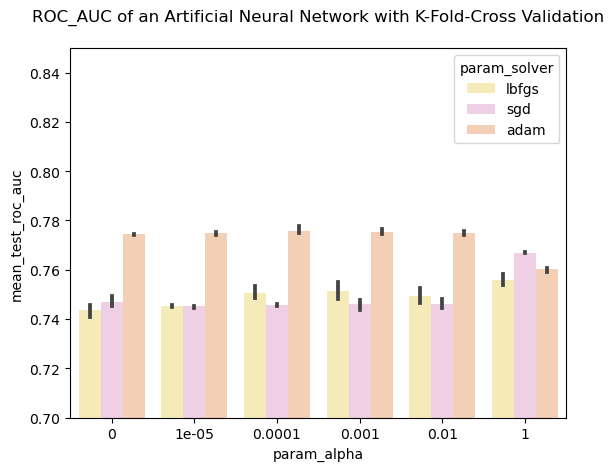

In [10]:
plot = sns.barplot(data=results, x='param_alpha', y='mean_test_roc_auc', hue='param_solver', palette='Pastel2_r')
plot.set(ylim=(0.7, 0.85))
plot.set(title='ROC_AUC of an Artificial Neural Network with K-Fold-Cross Validation\n')

[Text(0.5, 1.0, 'Accuracy of an Artificial Neural Network with K-Fold-Cross Validation\n')]

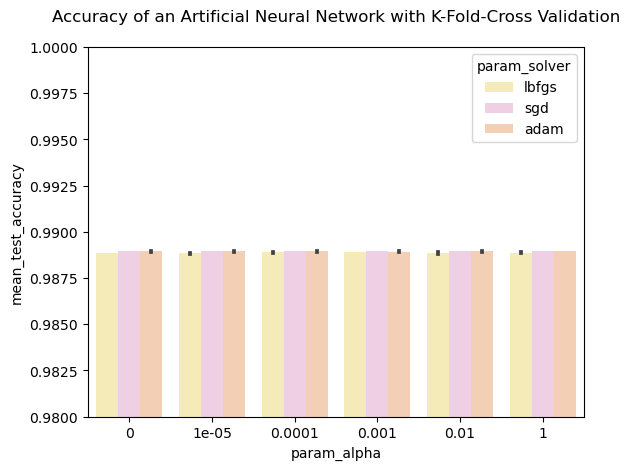

In [13]:
plot = sns.barplot(data=results, x='param_alpha', y='mean_test_accuracy', hue='param_solver', palette='Pastel2_r')
plot.set(ylim=(0.98, 1))
plot.set(title='Accuracy of an Artificial Neural Network with K-Fold-Cross Validation\n')